**Predict Cooling and Heating Loads using Multivariate Regression**

## 1. Load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx',names=["Relative Compactness","Surface Area","Wall Area","Roof Area",
                                                   "Overall Height","Orientation","Glazing Area","Glazing Area Distribution",
                                                  "Heating Load","Cooling Load"])

## 2. Data Exploration

In [ ]:
df.shape

(768, 10)

In [ ]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [ ]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## 3.Data Visualization

In [ ]:
#Normalized
df['Surface Area_Normalized'] = df['Surface Area']/df['Surface Area'].max()
df['Wall Area_Normalized'] = df['Wall Area']/df['Wall Area'].max()
df['Roof Area_Normalized'] = df['Roof Area']/df['Roof Area'].max()

In [ ]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Surface Area_Normalized,Wall Area_Normalized,Roof Area_Normalized
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,0.636364,0.705882,0.500000
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,0.636364,0.705882,0.500000
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,0.636364,0.705882,0.500000
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,0.636364,0.705882,0.500000
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,0.696970,0.764706,0.555556


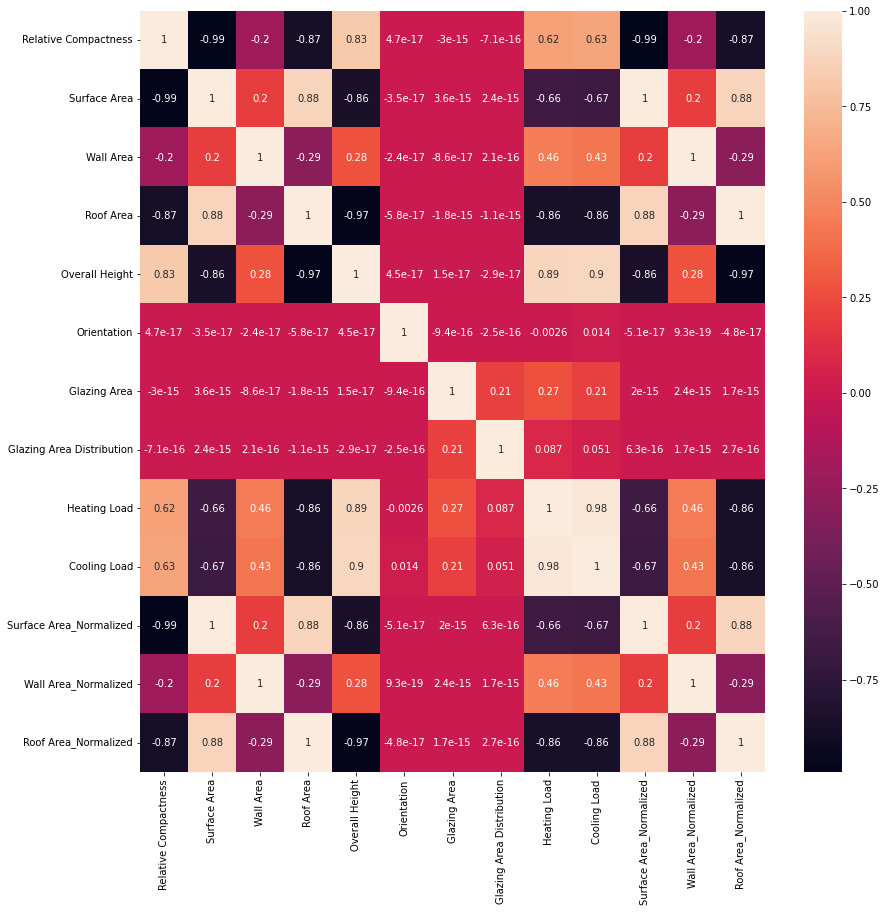

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot = True)

## 4.Preprocessing - Extract Features

In [ ]:
X = df.drop(['Heating Load','Cooling Load'],axis =1)
y = df[['Heating Load','Cooling Load']]

In [ ]:
X.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Surface Area_Normalized      float64
Wall Area_Normalized         float64
Roof Area_Normalized         float64
dtype: object

In [ ]:
#p-value is < 0.001 : correlation is very significant
#p-value is < 0.05: correlation is significant
#p-value is < 0.1: the correlation is weakly significant
#p-value is > 0.1: no evidence that the correlation is significant

In [ ]:
from sklearn import preprocessing
import scipy.stats as stats

for i in X.columns:
  pearson_coef, p_value = stats.pearsonr(X[i],y['Heating Load'])
  print('Feature',i,':')
  print('Correlation Coefficient is', pearson_coef, ' while P-value is ', p_value)

Feature Relative Compactness :
Correlation Coefficient is 0.6222719356777702  while P-value is  1.5915756113581834e-83
Feature Surface Area :
Correlation Coefficient is -0.6581199170654204  while P-value is  1.6873727592213314e-96
Feature Wall Area :
Correlation Coefficient is 0.455671365375227  while P-value is  1.2217759277555014e-40
Feature Roof Area :
Correlation Coefficient is -0.8618280515790429  while P-value is  4.9174220135254555e-228
Feature Overall Height :
Correlation Coefficient is 0.8894304644356393  while P-value is  1.1417039126754208e-262
Feature Orientation :
Correlation Coefficient is -0.002586762795754774  while P-value is  0.942944251855685
Feature Glazing Area :
Correlation Coefficient is 0.26984168530283703  while P-value is  2.7955258619257164e-14
Feature Glazing Area Distribution :
Correlation Coefficient is 0.08736845962962  while P-value is  0.015438977030365793
Feature Surface Area_Normalized :
Correlation Coefficient is -0.6581199170654203  while P-value is

Với Heating Load:\
'Relative Compactness' có P_value < 0.001 --> mức độ tương quan mạnh\
'Surface Area_Normalized' có P_value < 0.001 --> mức độ tương quan mạnh\
'Wall Area_Normalized' có P_value < 0.001 --> mức độ tương quan mạnh\
'Roof Area_Normalized' có P_value < 0.001 --> mức độ tương quan mạnh\
'Overall Height' có P_value < 0.001 --> mức độ tương quan mạnh\
'Glazing Area' có P_value < 0.001 --> mức độ tương quan mạnh\
'Glazing Area Distribution' có P_value < 0.05 --> mức độ tương quan đáng kể



In [ ]:
for i in X.columns:
  pearson_coef, p_value = stats.pearsonr(X[i],y['Cooling Load'])
  print('Feature',i,':')
  print('Correlation Coefficient is', pearson_coef, ' while P-value is ', p_value)

Feature Relative Compactness :
Correlation Coefficient is 0.6343390663353593  while P-value is  1.0608759912582303e-87
Feature Surface Area :
Correlation Coefficient is -0.6729989333544866  while P-value is  2.0052123210792597e-102
Feature Wall Area :
Correlation Coefficient is 0.4271169976671334  while P-value is  2.1081966043419287e-35
Feature Roof Area :
Correlation Coefficient is -0.862546603524974  while P-value is  7.732002122015264e-229
Feature Overall Height :
Correlation Coefficient is 0.8957851688924499  while P-value is  5.855770613018753e-272
Feature Orientation :
Correlation Coefficient is 0.014289597576170203  while P-value is  0.6925623867163834
Feature Glazing Area :
Correlation Coefficient is 0.20750499116036222  while P-value is  6.456865072121636e-09
Feature Glazing Area Distribution :
Correlation Coefficient is 0.05052511880567566  while P-value is  0.16187117468126605
Feature Surface Area_Normalized :
Correlation Coefficient is -0.6729989333544864  while P-value is

Với Cooling Load:\
'Relative Compactness' có P_value < 0.001 --> mức độ tương quan mạnh\
'Surface Area_Normalized' có P_value < 0.001 --> mức độ tương quan mạnh\
'Wall Area_Normalized' có P_value < 0.001 --> mức độ tương quan mạnh\
'Roof Area_Normalized' có P_value < 0.001 --> mức độ tương quan mạnh\
'Overall Height' có P_value < 0.001 --> mức độ tương quan mạnh\
'Glazing Area' có P_value < 0.001 --> mức độ tương quan mạnh\
'Glazing Area Distribution' có P_value < 0.05 --> mức độ tương quan đáng kể

**==> các biến để xây dựng mô hình:\
Relative Compactness\
Surface Area_Normalized\
Wall Area_Normalized\
Roof Area_Normalized\
Overall Height\
Glazing Area\
Glazing Area Distribution**:



In [ ]:
features = ['Relative Compactness', 'Surface Area_Normalized','Wall Area_Normalized','Roof Area_Normalized','Overall Height','Glazing Area','Glazing Area Distribution']
X_model = X[features]
y1 = y['Heating Load']
y2 = y['Cooling Load']

## 5.Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats.stats import pearsonr


**Dự đoán Heating Load**


In [ ]:
#chia tệp
X_train, X_test, y1_train, y1_test = train_test_split(X_model, y1, test_size =0.2, random_state=42)

In [ ]:
linear_heat = LinearRegression()
linear_heat.fit(X_train,y1_train)


LinearRegression()

In [ ]:
y_pred1 = linear_heat.predict(X_test)

In [ ]:
intercept = linear_heat.intercept_
intercept

79.50815869470415

In [ ]:
slopes = linear_heat.coef_
slopes

array([-61.83479899, -16.08043722,  -1.09474109, -28.44687943,
         4.1279239 ,  20.13552323,   0.21101456])

==>  Heating Load = 79,5 -61,83 x Relative Compactness - 16.08 x Surface Area_Normalized - 1.09 x Wall Area_Normalized -28.44 x Roof Area_Normalized + 4.12 x Overall Height + 20.13 x Glazing Area + 0.21 x Glazing Area Distribution

**Dự đoán Cooling Load**

In [ ]:
X_train, X_test, y2_train, y2_test = train_test_split(X_model, y2, test_size =0.2, random_state=42)

In [ ]:
linear_cool = LinearRegression()
linear_cool.fit(X_train,y2_train)

LinearRegression()

In [ ]:
y_pred2 = linear_cool.predict(X_test)

In [ ]:
intercept = linear_cool.intercept_
intercept

100.96696654745713

In [ ]:
slopes = linear_cool.coef_
slopes

array([-7.11501474e+01, -2.03486504e+01, -7.78301887e+00, -2.99552301e+01,
        4.03891910e+00,  1.48006397e+01,  3.38904797e-02])

## 6.Evaluation

==> Cooling Load = 100,97 -7.11 x Relative Compactness - 2.03 x Surface Area_Normalized - 7.78 x Wall Area_Normalized -2.99 x Roof Area_Normalized + 4.03 x Overall Height + 1.48 x Glazing Area + 3.38 x Glazing Area Distribution

### Đánh giá mô hình Heating_load

In [ ]:
#Heating_load
print('The full R-square is : ',linear_heat.score(X_model,y1))
print('The train R-square is : ',linear_heat.score(X_train,y1_train))
print('The test R-square is : ',linear_heat.score(X_test,y1_test))


The full R-square is :  0.9161327498451691
The train R-square is :  0.9170521258328708
The test R-square is :  0.9122131164945249


R-square của cả tập train, test đều >0.9\
--> hơn 90% giá trị của Heating_load có thể giải thích qua mô hình hồi quy đa biến này\
--> mô hình tốt

In [ ]:
#Find MSE , MAE
mse = mean_squared_error(y1_test,y_pred1)
mae = mean_absolute_error(y1_test,y_pred1)
print('The MSE of Heating_load and predicted value is : ',mse)
print('The MSA of Heating_load and predicted value is : ',mae)

The MSE of Heating_load and predicted value is :  9.150238371119464
The MSA of Heating_load and predicted value is :  2.1840082797536766


In [ ]:
#Heating Load
print(pearsonr(linear_heat.predict(X_test),y1_test))

(0.9553894903277148, 2.0931941089061802e-82)


Hệ số tương quan giữa y dự đoán và y test là ~0.95 và P_value <0,0001\
--> mô hình tốt

Text(0.5, 1.0, 'Heating Load')

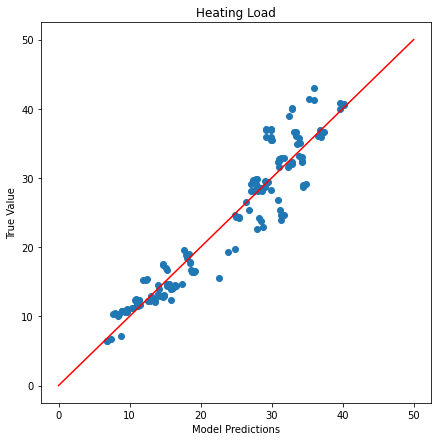

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred1,y1_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0,50],[0,50], color = 'red')
plt.title('Heating Load')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

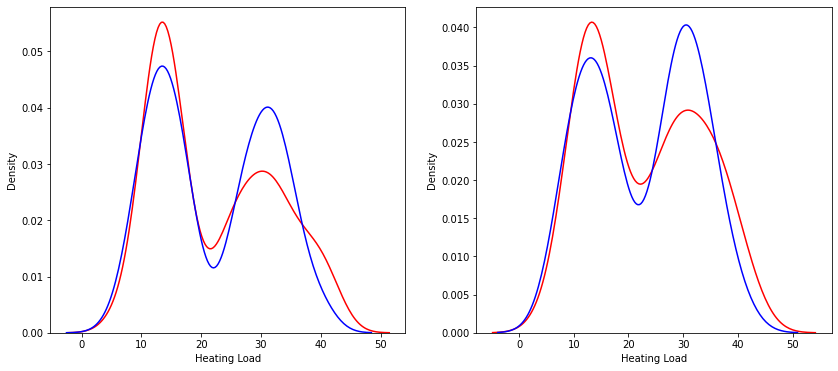

In [ ]:
plt.figure(figsize=(14,6))
#visualization
plt.subplot(1,2,1)
ax1 = sns.distplot(y1_train,hist=False,color="r",
                  label="Actual Train Values")
sns.distplot(linear_heat.predict(X_train),hist=False,color="b",
           label = "Predicted Train Values",ax=ax1)
#visualization
plt.subplot(1,2,2)
ax2 = sns.distplot(y1_test,hist=False,color="r",
                 label="Actual Test Values")
sns.distplot(linear_heat.predict(X_test),hist=False,color="b",
           label="Predicted Test Values",ax=ax2)
plt.show()

### Đánh giá mô hình Cooling_load

In [ ]:
#Cooling_load 
print('The full R-square is : ',linear_cool.score(X_model,y2))
print('The train R-square is : ',linear_cool.score(X_train,y2_train))
print('The test R-square is : ',linear_cool.score(X_test,y2_test))

The full R-square is :  0.8874323927453485
The train R-square is :  0.8858794309147866
The test R-square is :  0.8926669863195607


**R-square của cả tập train, test đều >0.88\
--> hơn 88% giá trị của Cooling_load có thể giải thích qua mô hình hồi quy đa biến này\
--> mô hình tốt**

In [ ]:
mse = mean_squared_error(y2_test,y_pred2)
mae = mean_absolute_error(y2_test,y_pred2)
print('The MSE of Heating_load and predicted value is : ',mse)
print('The MSA of Heating_load and predicted value is : ',mae)

The MSE of Heating_load and predicted value is :  9.945180471161317
The MSA of Heating_load and predicted value is :  2.202324740565758


In [ ]:
print(pearsonr(linear_cool.predict(X_test),y2_test))

(0.9456981018420164, 4.465749410730414e-76)


**Hệ số tương quan giữa y dự đoán và y test là ~0.94 và P_value <0,0001\
--> mô hình tốt**

Text(0.5, 1.0, 'Cooling Load')

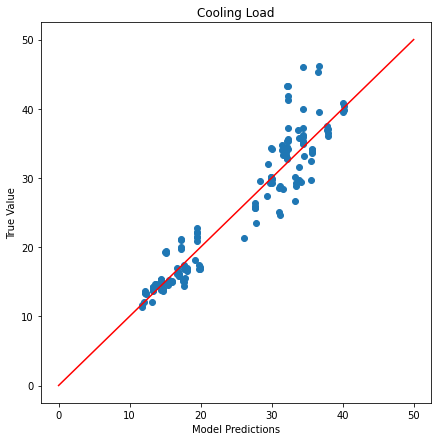

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred2,y2_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0,50],[0,50], color = 'red')
plt.title('Cooling Load')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

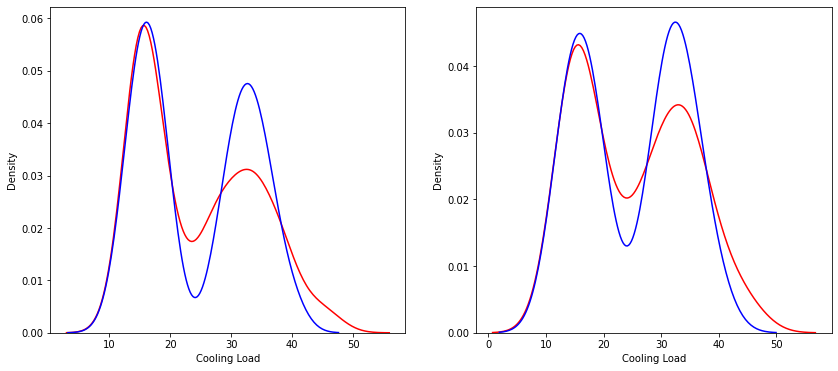

In [ ]:
plt.figure(figsize=(14,6))
#visualization
plt.subplot(1,2,1)
ax1 = sns.distplot(y2_train,hist=False,color="r",
                  label="Actual Train Values")
sns.distplot(linear_cool.predict(X_train),hist=False,color="b",
           label = "Predicted Train Values",ax=ax1)
#visualization
plt.subplot(1,2,2)
ax2 = sns.distplot(y2_test,hist=False,color="r",
                 label="Actual Test Values")
sns.distplot(linear_cool.predict(X_test),hist=False,color="b",
           label="Predicted Test Values",ax=ax2)
plt.show()

In [ ]:
modeltosave_heat = linear_heat
modeltosave_cool = linear_cool
import pickle as cPkl
import os

In [ ]:
with open ('/content/drive/MyDrive/Mindx/Minh_nhom1_model_heat.pkl','wb') as f: cPkl.dump(modeltosave_heat, f)
print('Saved model')

Saved model


In [ ]:
with open ('/content/drive/MyDrive/Mindx/Minh_nhom1_model_cool.pkl','wb') as f: cPkl.dump(modeltosave_cool, f)
print('Saved model')

Saved model
